In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv('./open/train.csv')
train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
# train set에 있는 주택소유상태 = 'ANY'인 것 삭제, test set에는 없는 항목이고 train set에도 1개 밖에 되지 않아 삭제하는 것이 좋다고 판단.

train_df = train_df[train_df['주택소유상태']!= 'ANY']

In [4]:
# 근로기간 컬럼 중복된 항목 합치기
# 함수 선언

def unit_standardization(x):
    if (x == '10+ years') or (x == '10+years'):
        return '10년이상'
    elif x == '9 years':
        return '9'
    elif x == '8 years':
        return '8'
    elif x == '7 years':
        return '7'
    elif x == '6 years':
        return '6'
    elif x == '5 years':
        return '5'
    elif x == '4 years':
        return '4'
    elif (x == '3 years') or (x == '3'):
        return '3'
    elif x == '2 years':
        return '2'
    elif (x == '1 year') or (x == '1 years'):
        return '1'
    elif (x == '< 1 year') or (x == '<1 year') :
        return '1년이하'
    else:
        return 'Unknown'

In [5]:
# train set에 적용

train_df['근로기간'] = train_df['근로기간'].apply(unit_standardization)

In [6]:
# 대출기간 범주형 --> 수치형으로 변경
# 함수 선언

def conv_loan_period(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [7]:
# train set에 적용

train_df['대출기간'] = train_df['대출기간'].apply(conv_loan_period)

In [8]:
display(train_df.head(3))

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10년이상,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [9]:
# 파생변수 생성하기

train_df['총상환액'] = train_df['총상환원금'] + train_df['총상환이자']

In [10]:
train_df['총상환대출비율'] = train_df['총상환액'] / train_df['대출금액']
train_df['월별대출금액'] = train_df['대출금액'] / train_df['대출기간']

In [11]:
train_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.0,0.000000,346666.666667
1,TRAIN_00001,14400000,60,10년이상,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,607632.0,0.042197,240000.000000
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1080588.0,0.090049,333333.333333


In [12]:
#수치형 데이터 로그 스케일링 적용

numeric_columns = train_df.select_dtypes(include=[np.number]).columns

train_df[numeric_columns] = np.log1p(train_df[numeric_columns])

In [13]:
numeric_columns

Index(['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금',
       '총상환이자', '총연체금액', '연체계좌수', '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [14]:
train_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,16.339638,3.610918,6,RENT,18.092177,2.990720,2.772589,부채 통합,0.0,0.000000,0.000000,0.0,0.0,C,0.000000,0.000000,12.756122
1,TRAIN_00001,16.482739,4.110874,10년이상,MORTGAGE,18.689180,3.149740,3.091042,주택 개선,0.0,12.830869,12.363337,0.0,0.0,B,13.317326,0.041331,12.388398
2,TRAIN_00002,16.300417,3.610918,5,MORTGAGE,18.379859,2.261763,2.708050,부채 통합,0.0,13.741482,11.931274,0.0,0.0,A,13.893017,0.086223,12.716901


In [15]:
# RobustScaler import
from sklearn.preprocessing import RobustScaler

In [16]:
# RobustScaler 객체 생성
rb_scaler = RobustScaler()

In [17]:
# 선택한 컬럼들에 대해 스케일링 적용
train_df[numeric_columns] = rb_scaler.fit_transform(train_df[numeric_columns])

In [18]:
# 범주형데이터 인코딩

from sklearn.preprocessing import LabelEncoder

In [19]:
# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

In [20]:
encoding_list = ['근로기간', '주택소유상태', '대출목적', '대출등급']

In [21]:
# 각 컬럼에 대해 라벨 인코딩 수행
for column in encoding_list:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [22]:
train_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,-0.347392,0.0,7,2,-0.119095,0.012141,-0.736282,1,0.0,-10.790385,-8.705499,0.0,0.0,2,-10.982819,-1.057168,-0.047264
1,TRAIN_00001,-0.180153,1.0,1,0,0.769179,0.251300,-0.210899,10,0.0,-0.381266,-0.141285,0.0,0.0,1,-0.352442,-0.366479,-0.507778
2,TRAIN_00002,-0.393228,0.0,6,0,0.308944,-1.084177,-0.842758,1,0.0,0.357474,-0.440580,0.0,0.0,0,0.107095,0.383725,-0.096381


In [23]:
# shap import

import shap

In [24]:
# train set을 train과 test로 나누기

from sklearn.model_selection import train_test_split

In [25]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '총상환액', '총상환대출비율', '월별대출금액'],
      dtype='object')

In [26]:
x_list = ['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       '총상환액', '총상환대출비율', '월별대출금액']

In [27]:
X = train_df[x_list] 
y = train_df['대출등급']

# Train set과 Test set으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72219, 16)
(24074, 16)
(72219,)
(24074,)


In [29]:
X_train.head(3)

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
67899,-0.303286,0.0,1,2,-1.150420,0.534288,0.300793,1,0.693147,0.288484,0.401812,0.0,0.0,0.293946,0.616964,0.000000
1176,0.403617,0.0,10,2,-0.614776,0.007600,-0.736282,1,0.000000,1.055398,0.852786,0.0,0.0,0.968243,1.043300,0.757504
24038,1.002085,0.0,1,0,0.640957,0.100203,-0.067348,1,0.000000,1.245203,0.943709,0.0,0.0,1.130532,0.510536,1.398813


In [30]:
# 머신러닝모델 라이브러리 

from sklearn.tree import DecisionTreeClassifier #할당받은거
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier #할당받은거
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier #할당받은거

# 평가 라이브러리

from sklearn.metrics import accuracy_score, f1_score

In [31]:
# GradientBoostingClassifier 초
# RobustScaler_재시도 파라미터 설정:  n_estimators=100, max_depth=5, learning_rate=0.1

gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1) 
#learning_rate=0.1, min_samples_split=3,min_samples_leaf=5, max_features=10
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.888547,0.888639
test,0.857980,0.857652


In [32]:
# XGBClassifier 
# RobustScaler_재시도 파라미터 설정:  n_estimators=100, max_depth=5, learning_rate=0.1

xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.860106,0.860061
test,0.842236,0.841786


In [33]:
# LGBMClassifier
# RobustScaler_재시도 파라미터 설정:  n_estimators=100, max_depth=5, learning_rate=0.1

lgb_model = LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state = 42)
lgb_model.fit(X_train, y_train)

y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.852781,0.852746
test,0.822713,0.822173


In [34]:
# RandomForestClassifier
# RobustScaler_재시도 파라미터 설정:  n_estimators=100, max_depth=5

rf_model = RandomForestClassifier(random_state = 42, n_estimators=100, max_depth=5, n_jobs=-1, criterion='entropy')
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.508578,0.481363
test,0.507020,0.479992


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# 모델 및 RFECV 객체 생성
# gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1) 
rfecv = RFECV(estimator=gb_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')  # StratifiedKFold를 사용하여 다중 분류에 적용
# 파라미터에 변수개수선택가능 min_features_to_select 설정가능

# RFECV 수행
selector = rfecv.fit(X, y)

# 특성 수에 따른 교차 검증 점수 시각화
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

# 선택된 특성 확인
selected_features = selector.support_
print("Selected Features:", selected_features)


selected_feature_indices = selector.get_support(indices=True)
print('selected_feature: ', selected_feature_indices)

In [387]:
selected_feature_names = [X.columns[i] for i in selected_feature_indices]
print(selected_feature_names)

['총상환대출비율']


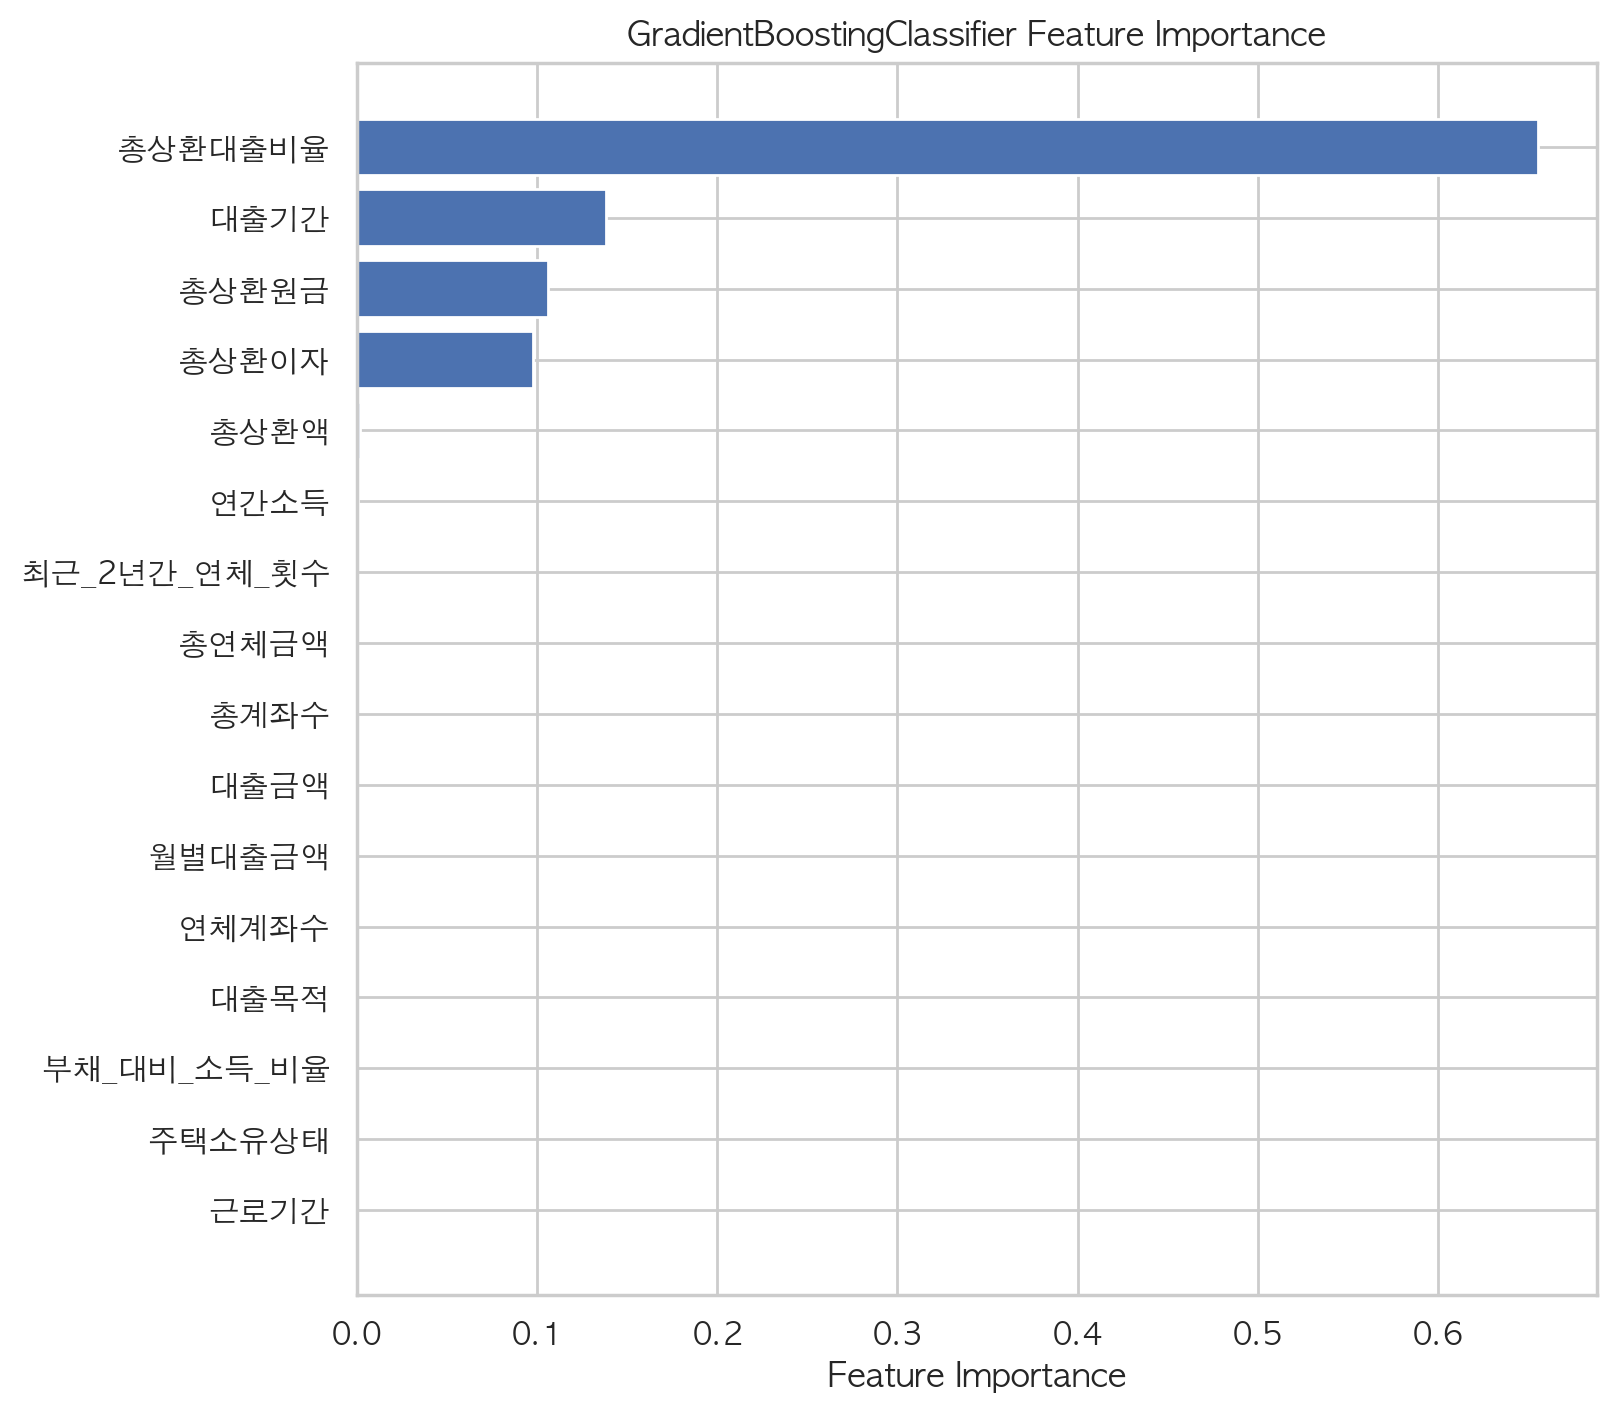

In [385]:
# 피처 중요도 얻기
feature_importances = gb_model.feature_importances_

# 피처 중요도를 피처 이름과 함께 DataFrame으로 만들기 (예시)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# 피처 중요도 시각화
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('GradientBoostingClassifier Feature Importance')
plt.show()